In [ ]:
import numpy as np
from datascience import *
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving low_popularity_spotify_data.csv to low_popularity_spotify_data.csv


In [ ]:
spot_data = pd.read_csv("low_popularity_spotify_data.csv")

# Check if any columns are missing values
print(spot_data.isnull().sum())

time_signature              1
track_popularity            0
speechiness                 1
danceability                1
playlist_name               0
duration_ms                 1
energy                      1
playlist_genre              0
playlist_subgenre           0
mode                        1
track_album_release_date    0
id                          1
instrumentalness            1
valence                     1
key                         1
tempo                       1
loudness                    1
acousticness                1
liveness                    1
track_album_name            0
dtype: int64


In [ ]:
#Drop rows with nulls
spot_data = spot_data.dropna()
print(spot_data.isnull().sum())

time_signature              0
track_popularity            0
speechiness                 0
danceability                0
playlist_name               0
duration_ms                 0
energy                      0
playlist_genre              0
playlist_subgenre           0
mode                        0
track_album_release_date    0
id                          0
instrumentalness            0
valence                     0
key                         0
tempo                       0
loudness                    0
acousticness                0
liveness                    0
track_album_name            0
dtype: int64


In [ ]:
# just want to have an idea of how this data is structured according to the
print(spot_data['playlist_genre'].value_counts())


playlist_genre
electronic    441
ambient       298
lofi          296
latin         241
world         224
hip-hop       168
arabic        158
pop           158
jazz          145
brazilian     134
classical     111
rock          110
wellness       80
turkish        64
afrobeats      62
indian         48
blues          43
soul           42
gospel         39
folk           35
gaming         33
funk           28
cantopop       27
korean         26
punk           24
reggae         19
metal          14
mandopop       14
soca           14
indie          13
j-pop          12
disco           9
country         8
k-pop           6
Name: count, dtype: int64


In [ ]:
# Want to see if any varibles are in need of changing their data type before moving on
spot_data.dtypes

,0
time_signature,float64
track_popularity,int64
speechiness,float64
danceability,float64
playlist_name,object
duration_ms,float64
energy,float64
playlist_genre,object
playlist_subgenre,object
mode,float64


In [ ]:
# mapping our genre column for our heatmap to work
genre_mapping = {'afrobeats':1, 'ambient':2, 'aribic': 3, 'blues': 4, 'brazilian': 5, 'classical':6, 'country': 7, 'electronic': 8,
    'folk':9, 'gaming': 10, 'hip-hop': 11, 'indian': 12, 'indie': 13, 'jazz': 14, 'j-pop': 15, 'korean':16, 'k-pop': 17,
    'latin' : 18, 'lofi': 19, 'metal': 20, 'pop': 21, 'punk': 22, 'r&b': 23, 'reggae': 24, 'rock': 25, 'soul': 26, 'turkish': 27,
    'world': 28, 'arabic': 29, 'cantopop': 30, 'disco': 31, 'funk': 32, 'gospel': 33, 'mandopop': 34, 'soca': 35, 'wellness': 36  }

spot_data['playlist_genre'].replace(genre_mapping, inplace= True)
spot_data

,time_signature,track_popularity,speechiness,danceability,playlist_name,duration_ms,energy,playlist_genre,playlist_subgenre,mode,instrumentalness,valence,key,tempo,loudness,acousticness,liveness
0,4.0,23,0.0393,0.636,88,138053.0,0.746,25,23,1.0,0.290000,0.432,0.0,132.310,-3.785,0.0648,0.1730
1,4.0,53,0.0317,0.572,88,241600.0,0.835,25,23,1.0,0.000377,0.795,0.0,129.981,-6.219,0.1710,0.0702
2,4.0,55,0.0454,0.591,88,329413.0,0.804,25,23,1.0,0.000006,0.658,0.0,111.457,-7.299,0.3270,0.0818
3,4.0,64,0.1010,0.443,61,185160.0,0.104,14,23,1.0,0.000000,0.394,0.0,76.474,-17.042,0.9130,0.1910
4,4.0,62,0.0298,0.685,61,205720.0,0.472,14,23,0.0,0.284000,0.475,9.0,80.487,-9.691,0.7850,0.2240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,1.0,33,0.0634,0.352,24,661293.0,0.424,12,24,1.0,0.000000,0.605,10.0,75.466,-8.009,0.9650,0.2420
3141,4.0,22,0.0656,0.471,24,394400.0,0.349,12,24,1.0,0.945000,0.358,8.0,147.193,-16.633,0.9750,0.2860
3142,4.0,18,0.0671,0.436,24,473440.0,0.595,12,24,1.0,0.868000,0.870,3.0,174.308,-11.494,0.8160,0.0939
3143,1.0,23,0.0813,0.489,24,298987.0,0.591,12,24,0.0,0.927000,0.689,8.0,174.760,-10.843,0.9480,0.0770


In [ ]:
#cheching if the values
print(spot_data['playlist_genre'].value_counts())


playlist_genre
8     441
2     298
19    296
18    241
28    224
11    168
29    158
21    158
14    145
5     134
6     111
25    110
36     80
27     64
1      62
12     48
4      43
26     42
33     39
9      35
10     33
32     28
30     27
16     26
22     24
24     19
20     14
34     14
35     14
13     13
15     12
31      9
7       8
17      6
Name: count, dtype: int64


In [ ]:
#mapping eacg value with a number
subgenre_mapping = {
    '80s': 1, '90s': 2, 'academic': 3, 'african': 4, 'afro house': 5, 'afro-latin': 6, 'alternative': 7, 'amapiano': 8, 'american': 9,
    'anime': 10, 'australian': 11, 'avant-garde': 12, 'bedroom': 13, 'bhangra': 14, 'bollywood': 15, 'cajun': 16,
    'carnival': 17, 'celtic': 18, 'chill': 19, 'chinese': 20, 'choral': 21, 'cinematic': 22, 'classic': 23, 'classical': 24,
    'cumbia': 25, 'death': 26, 'deep house': 27, 'delta': 28, 'desi': 29, 'drama': 30, 'drill': 31, 'essential': 32,
    'experimental': 33, 'feel-good': 34, 'forró': 35, 'french': 36, 'funk': 37, 'fusion': 38, 'future': 39, 'future bass': 40,
    'gangster': 41, 'gqom': 42, 'grime': 43, 'hardstyle': 44, 'heavy': 45, 'hip-hop': 46, 'indie': 47, 'indigenous': 48,
    'irish': 49, 'italo': 50, 'japanese': 51, 'jewish': 52, 'klezmer': 53, 'latin': 54, 'meditative': 55, 'melodic': 56, 'modern': 57,
    'neo-classical': 58, 'nigerian': 59, 'noir': 60, 'nordic': 61, 'pop': 62, 'pop punk': 63, 'post-rock': 64, 'reggaeton': 65,
    'retro': 66, 'samba': 67, 'scandi': 68, 'smooth': 69, 'soundtracks': 70, 'southern': 71, 'spanish': 72, 'tango': 73, 'techno': 74,
    'throat singing': 75, 'trap': 76, 'tropical': 77, 'vaporwave': 78, 'workout': 79, 'yoga': 80}

# Replace subgenre names with associated numbers
spot_data['playlist_subgenre'].replace( subgenre_mapping, inplace= True)

# view the table
spot_data


,time_signature,track_popularity,speechiness,danceability,playlist_name,duration_ms,energy,playlist_genre,playlist_subgenre,mode,track_album_release_date,id,instrumentalness,valence,key,tempo,loudness,acousticness,liveness,track_album_name
0,4.0,23,0.0393,0.636,Rock Classics,138053.0,0.746,25,23,1.0,12/14/2005,5e6x5YRnMJIKvYpZxLqdpH,0.290000,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...
1,4.0,53,0.0317,0.572,Rock Classics,241600.0,0.835,25,23,1.0,3/27/2015,5FqYA8KfiwsQvyBI4IamnY,0.000377,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection
2,4.0,55,0.0454,0.591,Rock Classics,329413.0,0.804,25,23,1.0,11/4/2016,5LNiqEqpDc8TuqPy79kDBu,0.000006,0.658,0.0,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition)
3,4.0,64,0.1010,0.443,Jazz Classics,185160.0,0.104,14,23,1.0,5/3/2007,78MI7mu1LV1k4IA2HzKmHe,0.000000,0.394,0.0,76.474,-17.042,0.9130,0.1910,"Love, Ella"
4,4.0,62,0.0298,0.685,Jazz Classics,205720.0,0.472,14,23,0.0,1/1/2000,6MN6yRVriszuyAVlyF8ndB,0.284000,0.475,9.0,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,1.0,33,0.0634,0.352,Carnatic Classics,661293.0,0.424,12,24,1.0,1/18/2013,1IkR0OgVI1gydC4S6jnG2B,0.000000,0.605,10.0,75.466,-8.009,0.9650,0.2420,Bhaja Govindam - Vishnu Sahasranamam
3141,4.0,22,0.0656,0.471,Carnatic Classics,394400.0,0.349,12,24,1.0,12/1/2002,4ZFM5yFsjEzvZ1XmP27L5r,0.945000,0.358,8.0,147.193,-16.633,0.9750,0.2860,Veenai Jayanthi Kumaresh
3142,4.0,18,0.0671,0.436,Carnatic Classics,473440.0,0.595,12,24,1.0,10/26/2010,5wZQXUcphAyBZfVdWmAiYX,0.868000,0.870,3.0,174.308,-11.494,0.8160,0.0939,Into the Raga
3143,1.0,23,0.0813,0.489,Carnatic Classics,298987.0,0.591,12,24,0.0,1/1/2007,5Ca5l5vDzIOZdVwwWCxAds,0.927000,0.689,8.0,174.760,-10.843,0.9480,0.0770,Thillanas: A Confluence Of Rhythm & Melody


In [ ]:
# mapping each playlist with a number
playlist_mapping = {
    "80s Rock Anthems": 1, "90s Hip-Hop": 2, "African Gospel": 3, "African Heat":4,"Afro Hits": 5, "Afro House": 6,
    "Afro Tech": 7, "Afro-Latin Party":8,"Alternative Rock":9, "Amapiano Grooves":10, "Ambient Chill": 11, "American Folk":12,
    "Anime Hits":13, "Arab X": 14, "Australian Indie": 15, "Avant-Garde Jazz": 16,"Bedroom Pop":17, "Bhangra Bangers":18,
    "Bollywood Butter":19, "Bollywood Workout": 20,"Brazilian Funk":21, "Cajun Zydeco": 22, "Cantopop Essentials": 23,
    "Carnatic Classics": 24, "Carnival Soca": 25, "Celtic Punk": 26, "Chill Hop": 27, "Chill Lofi Study Beats":28,
    "Chill Spanish Vibes":29, "Chinese Traditional":30, "Choral Classics": 31,"Classic Blues": 32, "Classic Country": 33,
    "Classical Essentials": 34,"Cumbia Classics": 35, "Dark Academia": 36, "Death Metal Essentials":37, "Deep House Relax":38,
    "Delta Blues": 39, "Desi Hip-Hop": 40, "Epic Film Scores":41,"Experimental Electronic":42, "Feel Good Indie Rock":43,
    "Forró Fiesta":44,"French Rap Classics": 45, "French Touch": 46, "Future Bass":47, "Future Funk": 48,"Gangster Rap": 49,
    "Gqom Nation":50, "Grime Shutdown": 51, "Hardstyle Bangers": 52,"Heavy Metal Classics": 53, "Hip-Hop Drive":54, "Indian Classical": 55,
    "Indie Folk":56, "Indie Rock Roadtrip": 57, "Indigenous Beats":58, "Irish Traditions": 59,"Italo Disco Classics":60,
    "Jazz Classics": 61, "Jazz Vibes": 62, "Jewish Music": 63,"K-Drama OSTs":64, "Klezmer Traditions": 65, "K-Pop Daebak": 66, "Latin Jazz":67,
    "Latin Trap": 68, "Latino Hip-Hop":69, "Lofi Hip Hop":70, "Mandopop Hits":71,"Meditative Vibes": 72, "Melodic Rap":73,
    "Middle Eastern Beats": 74,"Middle Eastern Chill": 75, "Minimalism": 76, "Modern Gospel": 77, "Neo-Classical": 78,"Nordic Electronica": 79,
    "Nordic Folk": 80, "Nordic Noir":81, "Pop Punk Powerhouses": 82,"Post-Rock Essentials": 83, "RapCaviar": 84, "Reggae Classics":85,
    "Reggae Fusion": 86,"Reggaeton Hits": 87, "Rock Classics": 88, "Rock This": 89, "Samba Essentials":90,"Scandi Pop": 91, "Smooth Jazz":92,
    "Soul Coffee": 93, "Southern Rock":94,"Spanish Rock Classics": 95, "Synthwave": 96, "Tango Classics": 97, "Techno Bunker":98,
    "Traditional Japanese": 99, "Trap": 100, "Tropical House":101, "Turkish Pop": 102, "Tuvan Throat Singing":103, "UK Drill":104,
    "Vaporwave Essentials":105, "Video Game Soundtracks":106, "Viva Latino":107, "Yoga & Meditation":108}

spot_data['playlist_name'].replace(playlist_mapping, inplace=True)

spot_data

,time_signature,track_popularity,speechiness,danceability,playlist_name,duration_ms,energy,playlist_genre,playlist_subgenre,mode,track_album_release_date,id,instrumentalness,valence,key,tempo,loudness,acousticness,liveness,track_album_name
0,4.0,23,0.0393,0.636,88,138053.0,0.746,25,23,1.0,12/14/2005,5e6x5YRnMJIKvYpZxLqdpH,0.290000,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...
1,4.0,53,0.0317,0.572,88,241600.0,0.835,25,23,1.0,3/27/2015,5FqYA8KfiwsQvyBI4IamnY,0.000377,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection
2,4.0,55,0.0454,0.591,88,329413.0,0.804,25,23,1.0,11/4/2016,5LNiqEqpDc8TuqPy79kDBu,0.000006,0.658,0.0,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition)
3,4.0,64,0.1010,0.443,61,185160.0,0.104,14,23,1.0,5/3/2007,78MI7mu1LV1k4IA2HzKmHe,0.000000,0.394,0.0,76.474,-17.042,0.9130,0.1910,"Love, Ella"
4,4.0,62,0.0298,0.685,61,205720.0,0.472,14,23,0.0,1/1/2000,6MN6yRVriszuyAVlyF8ndB,0.284000,0.475,9.0,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,1.0,33,0.0634,0.352,24,661293.0,0.424,12,24,1.0,1/18/2013,1IkR0OgVI1gydC4S6jnG2B,0.000000,0.605,10.0,75.466,-8.009,0.9650,0.2420,Bhaja Govindam - Vishnu Sahasranamam
3141,4.0,22,0.0656,0.471,24,394400.0,0.349,12,24,1.0,12/1/2002,4ZFM5yFsjEzvZ1XmP27L5r,0.945000,0.358,8.0,147.193,-16.633,0.9750,0.2860,Veenai Jayanthi Kumaresh
3142,4.0,18,0.0671,0.436,24,473440.0,0.595,12,24,1.0,10/26/2010,5wZQXUcphAyBZfVdWmAiYX,0.868000,0.870,3.0,174.308,-11.494,0.8160,0.0939,Into the Raga
3143,1.0,23,0.0813,0.489,24,298987.0,0.591,12,24,0.0,1/1/2007,5Ca5l5vDzIOZdVwwWCxAds,0.927000,0.689,8.0,174.760,-10.843,0.9480,0.0770,Thillanas: A Confluence Of Rhythm & Melody


In [ ]:
#spot_data = spot_data.drop(columns=['track_artist','track_album_release_date' ,'track_href', 'track_name', 'uri', 'type', 'analysis_url', 'id', 'track_album_id', 'playlist_id', 'track_id', 'track_album_name'])
spot_data = spot_data.drop(columns=['track_album_release_date' , 'id', 'track_album_name'])


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


<Axes: >

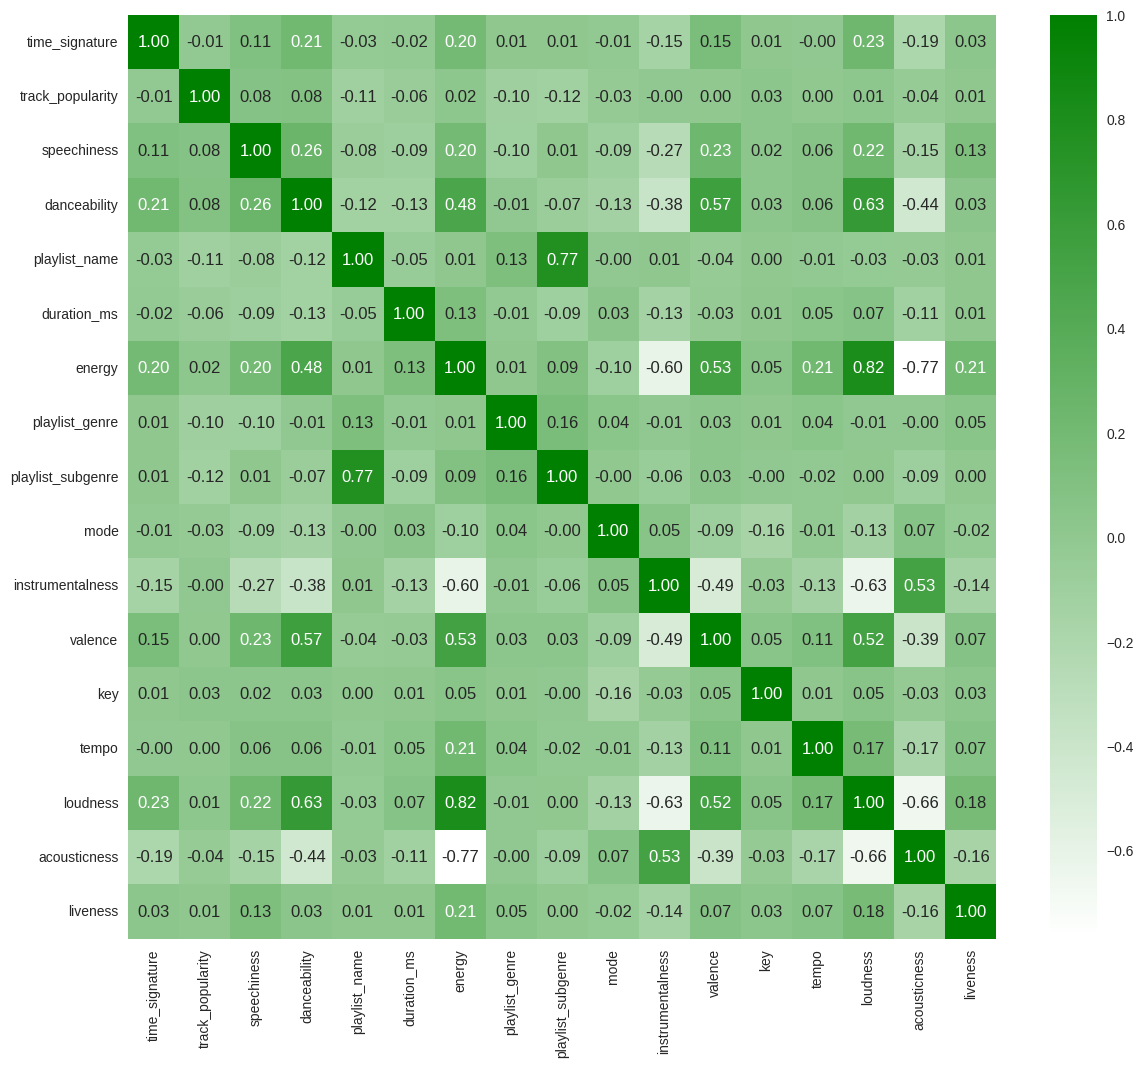

In [ ]:
# Keep only numeric columns
numeric_data = spot_data.select_dtypes(include=['number'])

# Customize the colors for the heatmap
colors = ["white", "green"]
cmap = LinearSegmentedColormap.from_list("whitegrean", colors)

plt.figure(figsize=(14, 12))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap=cmap)



<Axes: xlabel='danceability', ylabel='loudness'>

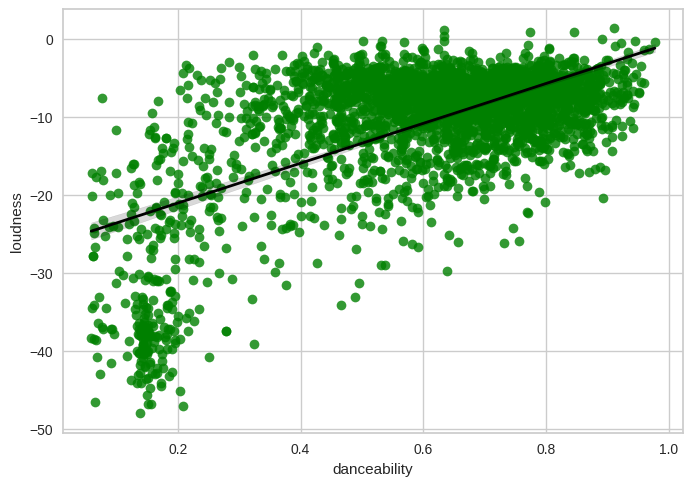

In [ ]:
sns.regplot(
    x='danceability',
    y='loudness',
    data=spot_data,
    color = 'green',
    line_kws={'color': 'black', 'linewidth': 2}
)

<Axes: xlabel='danceability', ylabel='acousticness'>

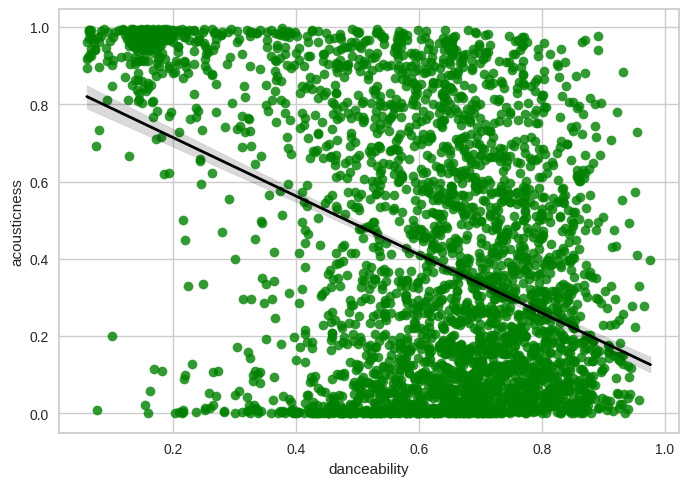

In [ ]:
sns.regplot(
    x='danceability',
    y='acousticness',
    data=spot_data,
    color = 'green',
    line_kws={'color': 'black', 'linewidth': 2}
)

In [ ]:
import scipy.stats as stats


In [ ]:
# Corr test to ensure our heatmap is producing correct numbers
corr, p_value = stats.pearsonr(numeric_data['danceability'], numeric_data['energy'])

print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.479996153079497
P-value: 6.270269163546871e-181


In [ ]:
# Perform ANOVA test to compare danceability and genre g
anova_result = stats.f_oneway(*(spot_data[spot_data['playlist_genre'] == genre]['danceability']
                                for genre in spot_data['playlist_genre'].unique()))

print(f"ANOVA test statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

ANOVA test statistic: 61.44360931533909
P-value: 3.51124981357929e-309


In [ ]:
#!pip install pycaret

In [ ]:
complete_filtered_spot

,time_signature,track_popularity,speechiness,danceability,playlist_name,duration_ms,energy,playlist_genre,playlist_subgenre,mode,instrumentalness,valence,key,tempo,loudness,acousticness,liveness
56,4.0,61,0.2510,0.872,84,146055.0,0.674,11,57,0.0,0.000000,0.357,2.0,135.975,-5.831,0.170000,0.1040
57,4.0,68,0.2640,0.652,84,150997.0,0.831,11,57,0.0,0.000000,0.648,10.0,139.905,-5.972,0.011100,0.2690
58,4.0,68,0.2770,0.848,49,171198.0,0.632,11,41,1.0,0.000000,0.253,2.0,123.987,-7.381,0.398000,0.2820
59,4.0,56,0.2730,0.676,49,186538.0,0.610,11,41,1.0,0.000002,0.519,1.0,156.005,-9.185,0.000114,0.1910
60,4.0,24,0.5650,0.874,49,166226.0,0.480,11,41,1.0,0.000000,0.563,11.0,84.098,-12.092,0.033000,0.1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,1.0,33,0.0634,0.352,24,661293.0,0.424,12,24,1.0,0.000000,0.605,10.0,75.466,-8.009,0.965000,0.2420
3141,4.0,22,0.0656,0.471,24,394400.0,0.349,12,24,1.0,0.945000,0.358,8.0,147.193,-16.633,0.975000,0.2860
3142,4.0,18,0.0671,0.436,24,473440.0,0.595,12,24,1.0,0.868000,0.870,3.0,174.308,-11.494,0.816000,0.0939
3143,1.0,23,0.0813,0.489,24,298987.0,0.591,12,24,0.0,0.927000,0.689,8.0,174.760,-10.843,0.948000,0.0770


In [ ]:
# Use only the data that would be useful according to the heat_map
filterd_data = spot_data.drop([ 'playlist_genre', 'key'], axis=1)


In [ ]:
#! pip install pycaret

In [ ]:
from pycaret.regression import * ##importing all from pycaret lib

spot_data = spot_data.dropna(axis =0)

In [ ]:
filtered_ml_model = setup(filterd_data, target = 'danceability')

,Description,Value
0,Session id,8697
1,Target,danceability
2,Target type,Regression
3,Original data shape,"(3144, 15)"
4,Transformed data shape,"(3144, 15)"
5,Transformed train set shape,"(2200, 15)"
6,Transformed test set shape,"(944, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models(exclude=['catboost'], n_select = 10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0812,0.0111,0.1051,0.7150,0.0678,0.1744,0.3950
gbr,Gradient Boosting Regressor,0.0849,0.0119,0.1088,0.6950,0.0703,0.1858,0.7320
et,Extra Trees Regressor,0.0855,0.0120,0.1096,0.6909,0.0703,0.1833,1.0240
rf,Random Forest Regressor,0.0857,0.0122,0.1101,0.6879,0.0709,0.1853,2.1110
xgboost,Extreme Gradient Boosting,0.0857,0.0127,0.1126,0.6739,0.0724,0.1846,0.3360
ada,AdaBoost Regressor,0.1039,0.0159,0.1261,0.5914,0.0815,0.2427,0.3160
lr,Linear Regression,0.1091,0.0184,0.1354,0.5281,0.0875,0.2534,0.0260
ridge,Ridge Regression,0.1091,0.0184,0.1354,0.5281,0.0875,0.2535,0.0240
br,Bayesian Ridge,0.1091,0.0184,0.1354,0.5280,0.0875,0.2537,0.0270
lar,Least Angle Regression,0.1091,0.0184,0.1356,0.5270,0.0875,0.2532,0.0310


Processing:   0%|          | 0/86 [00:00<?, ?it/s]

[LGBMRegressor(n_jobs=-1, random_state=8697),
 GradientBoostingRegressor(random_state=8697),
 ExtraTreesRegressor(n_jobs=-1, random_state=8697),
 RandomForestRegressor(n_jobs=-1, random_state=8697),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=8697, ...),
 AdaBoostRegressor(random_state=8697),


In [ ]:
filtered_lightModel = create_model('lightgbm')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0853,0.0121,0.1098,0.6956,0.0707,0.1744
1,0.0905,0.0135,0.1161,0.6183,0.0748,0.1823
2,0.0812,0.0111,0.1054,0.7359,0.0664,0.1647
3,0.0801,0.0114,0.1067,0.7125,0.0699,0.1909
4,0.0720,0.0090,0.0947,0.7766,0.0623,0.1634
5,0.0774,0.0097,0.0986,0.7579,0.0641,0.1869
6,0.0843,0.0119,0.1090,0.7074,0.0684,0.1666
7,0.0787,0.0101,0.1007,0.7017,0.0650,0.1554
8,0.0826,0.0113,0.1065,0.7097,0.0679,0.1699


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

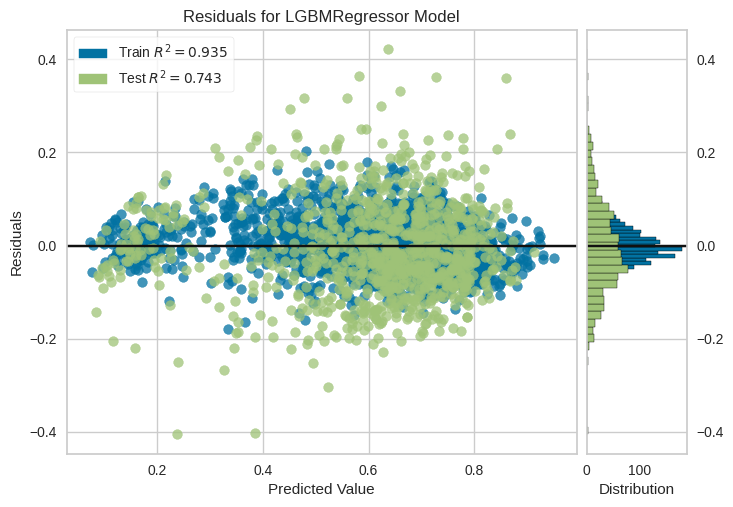

In [ ]:
plot_model(filtered_lightModel)

Below is an idea we had to grow our project


In [ ]:
print("Pick your favorite genres by number (comma separated):\n")
for genre, num in genre_mapping.items():
    if num == 9 or num == 18  or num == 27 or num == 36:
        print(f"{num}. {genre}")
    else:
        print(f"{num}. {genre}\t",end=" ")

Pick your favorite genres by number (comma separated):

1. afrobeats	 2. ambient	 3. aribic	 4. blues	 5. brazilian	 6. classical	 7. country	 8. electronic	 9. folk
10. gaming	 11. hip-hop	 12. indian	 13. indie	 14. jazz	 15. j-pop	 16. korean	 17. k-pop	 18. latin
19. lofi	 20. metal	 21. pop	 22. punk	 23. r&b	 24. reggae	 25. rock	 26. soul	 27. turkish
28. world	 29. arabic	 30. cantopop	 31. disco	 32. funk	 33. gospel	 34. mandopop	 35. soca	 36. wellness


In [ ]:
# Input for the genres they want to listen to
selected = input("\nEnter genre numbers (Example: 1,5,11,20): ")

# Convert the input of string to a list of numbers
selected_nums = [int(x.strip()) for x in selected.split(',')]

#Print the number selected so we have an idea (might delete later)
print("\nYou selected these genres:")
print(selected_nums)


Enter genre numbers (Example: 1,5,11,20): 1,6,31

You selected these genres:
[1, 6, 31]


In [ ]:
# filter the data according to the input of the user
complete_filtered_spot = spot_data[spot_data['playlist_genre'].isin(selected_nums)]




NameError: name 'selected_nums' is not defined